In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Glucose'] = df['Glucose'].replace(0 , df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0 , df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

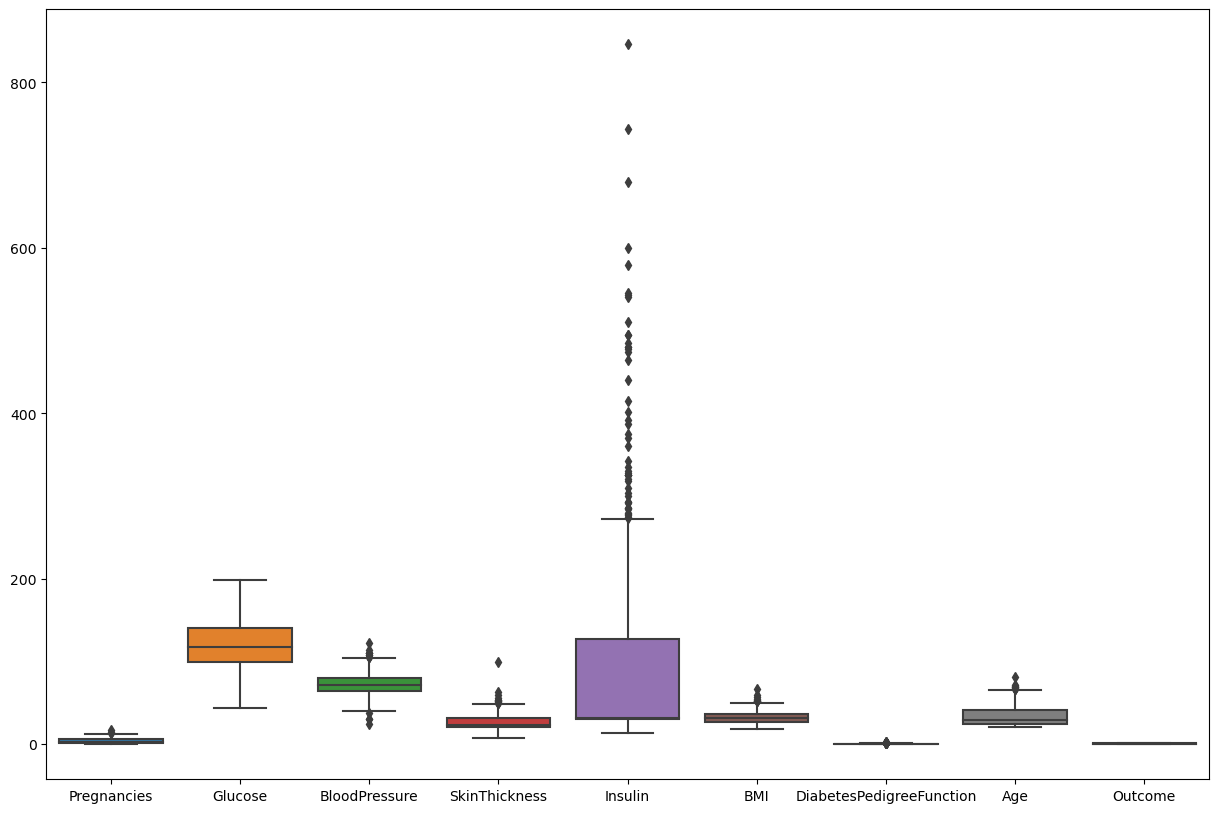

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

<AxesSubplot: >

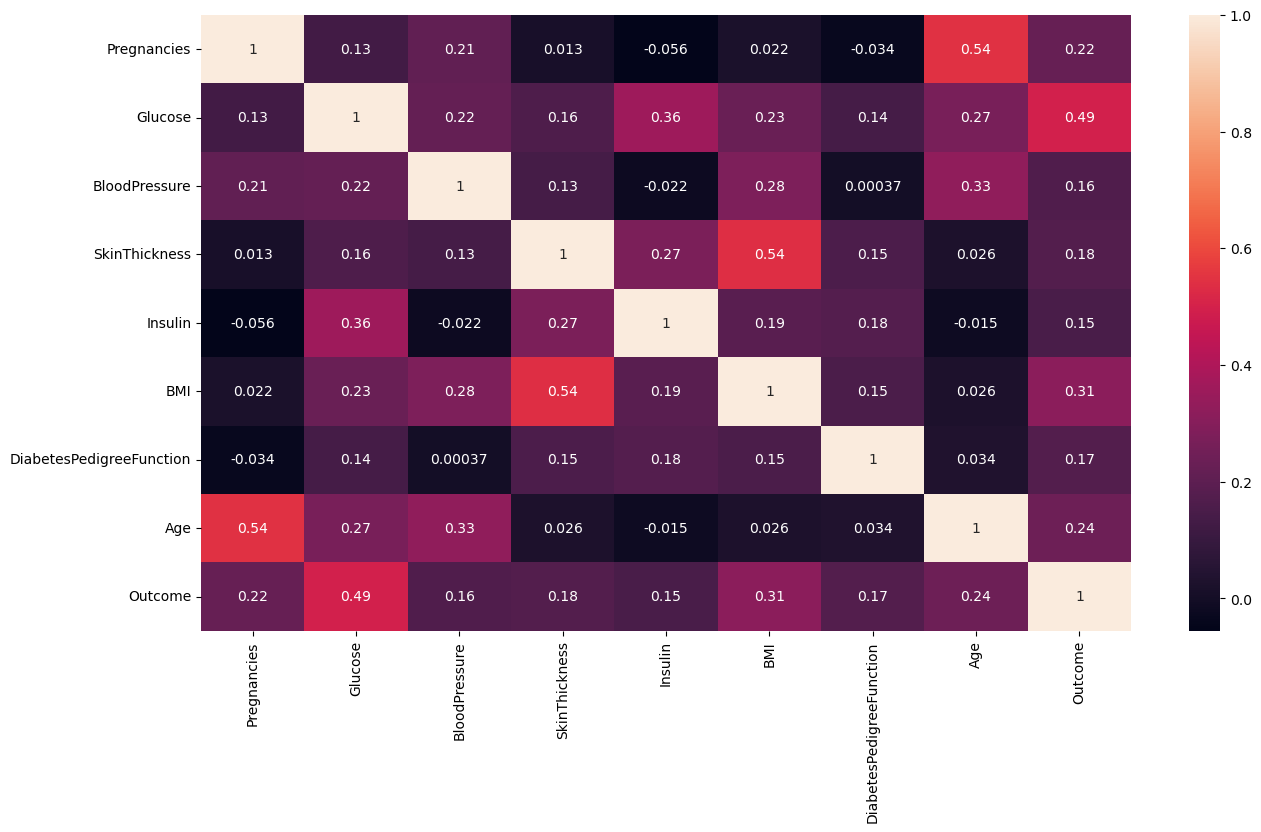

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
# dependent and dependent features
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train ,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
X_train.shape ,X_test.shape

((576, 8), (192, 8))

# feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
import pickle
def scaler_standard(X_train ,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pickle.dump(scaler , open('standardScaler.pkl' , 'wb'))
    
    return X_train_scaled ,X_test_scaled

In [21]:
X_train_scaled,X_test_scaled = scaler_standard(X_train,X_test)

In [22]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

# model training [Decision Tree classifier]

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
classifier = DecisionTreeClassifier()

In [30]:
parameters = {
    'criterion' : ['ginni' , 'entropy' , 'log_loss'],
    'splitter' : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto' , 'sqrt' , 'log2']
    
}

In [41]:
clf = GridSearchCV(classifier , param_grid=parameters , cv=3 , scoring = 'accuracy' )
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [43]:
classifier = DecisionTreeClassifier(criterion='entropy' , max_depth=3 , max_features='sqrt' , splitter='best')

In [44]:
classifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

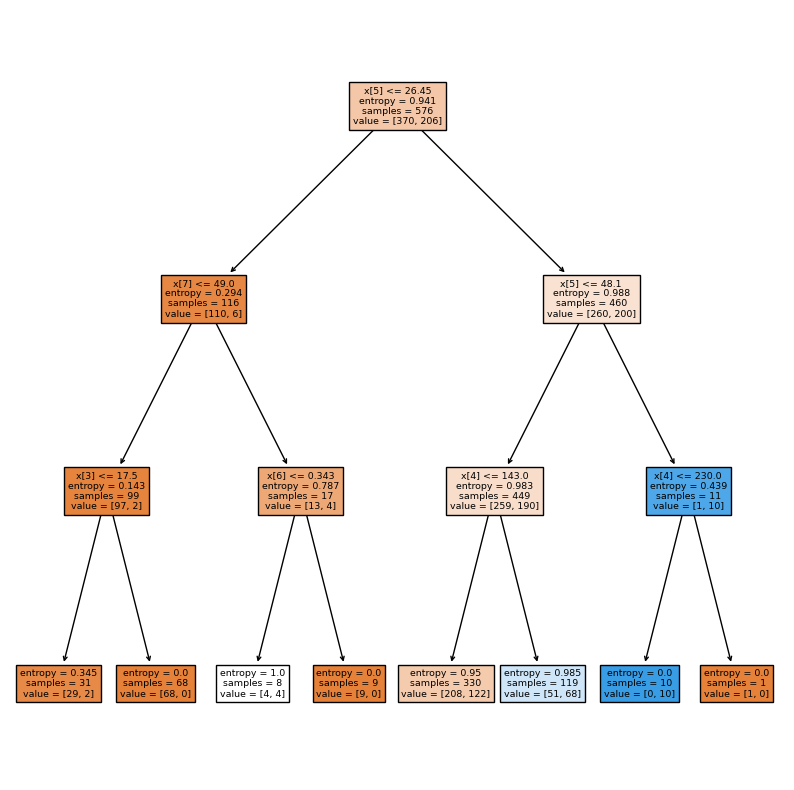

In [47]:
plt.figure(figsize=(10,10))
from sklearn import tree
tree.plot_tree(classifier,filled=True)
plt.show()

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [51]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [52]:
conf_matrix

array([[120,  10],
       [ 46,  16]])

In [53]:
accuracy = accuracy_score(y_test,y_pred)

In [54]:
accuracy

0.7083333333333334

In [55]:
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

In [76]:
precision = true_positive / (true_positive + false_positive)


In [57]:
precision


0.9230769230769231

In [58]:
recall = true_positive / (true_positive + false_negative)
recall

0.7228915662650602

# model training [SVC]

In [88]:
from sklearn.svm import SVC

In [89]:
svc = SVC()

In [90]:
param_grid = {
    'C' : [0.1,1,10],
    'kernel' : ['linear' , 'rbf' , 'polynomail'],
    'gamma' : [1,0.1,0.01,0.001,0.0001]
}

In [91]:
grid = GridSearchCV(svc , param_grid = param_grid , cv=3 , scoring='accuracy' , refit=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomail']},
             scoring='accuracy')

In [92]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [93]:
svc = SVC(C = 10 , gamma=1 , kernel='linear')
svc.fit(X_train,y_train)

SVC(C=10, gamma=1, kernel='linear')

In [94]:
y_pred_svc = svc.predict(X_test)

In [95]:
conf_matrix = confusion_matrix(y_test,y_pred_svc)

In [96]:
conf_matrix

array([[117,  13],
       [ 26,  36]])

In [97]:
accuracy = accuracy_score(y_test,y_pred_svc)

In [98]:
accuracy

0.796875

In [99]:
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

In [100]:
precision = true_positive / (true_positive + false_positive)

In [101]:
precision

0.9

In [102]:
recall = true_positive / (true_positive + false_negative)
recall

0.8181818181818182

In [103]:
import pickle
pickle.dump(svc , open('svcModelForPrediction' , 'wb'))